<a href="https://colab.research.google.com/github/MillenRodrigues/Atividade-T4/blob/main/Atividade_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade de Aprofundamento - Trilha 4


### Millen Tavares Rodrigues         Tia: 92300073

Disponível em [GitHub](https://github.com/MillenRodrigues/Atividade-T4/blob/main/Atividade_T4.ipynb)
----


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8] # para figuras maiores

In [4]:
# Baixa os dados da Gap Minder
# Conclusão da escola primária
!wget https://github.com/MillenRodrigues/Atividade-T4/raw/main/dataset/primary_completion_rate_total_percent_of_relevant_age_group.csv
# Indice de desigualdade de renda
!wget https://github.com/MillenRodrigues/Atividade-T4/raw/main/dataset/gini.csv

--2023-03-18 00:50:18--  https://github.com/MillenRodrigues/Atividade-T4/raw/main/dataset/primary_completion_rate_total_percent_of_relevant_age_group.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MillenRodrigues/Atividade-T4/main/dataset/primary_completion_rate_total_percent_of_relevant_age_group.csv [following]
--2023-03-18 00:50:18--  https://raw.githubusercontent.com/MillenRodrigues/Atividade-T4/main/dataset/primary_completion_rate_total_percent_of_relevant_age_group.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30912 (30K) [text/plain]
Saving to: ‘primary_completion_rate_total_pe

# Analise dos dados de escolaridade primaria por pais ao longo dos anos

In [5]:
escola_primaria=pd.read_csv('primary_completion_rate_total_percent_of_relevant_age_group.csv')
display(escola_primaria.shape)
display(escola_primaria.head())


(199, 53)

,country,1969,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.6,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,16.7,NaN,NaN,17.9,19.7,...,NaN,NaN,NaN,NaN,80.5,84.4,85.6,84.3,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.7,89.5,101.0,98.9,99.9,102.0,102.0,103.0,101.0,NaN
4,United Arab Emirates,NaN,NaN,NaN,NaN,39.5,41.7,49.5,56.8,60.7,...,93.9,95.7,99.1,104.0,NaN,NaN,NaN,112.0,105.0,NaN


In [6]:
# reformatando a tabela para um formato mais conveniente
escola_primaria=escola_primaria.set_index('country')
escola_primaria=escola_primaria.T
escola_primaria.columns.name = 'Ano'
display(escola_primaria.head())

Ano,Aruba,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Austria,Azerbaijan,...,Venezuela,British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1969,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,NaN,NaN,NaN,NaN,71.8,NaN,NaN,95.0,NaN,...,59.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.9,NaN,...,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.6,NaN
1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.1,NaN,...,66.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.3,NaN
1973,NaN,16.7,NaN,NaN,39.5,75.6,NaN,NaN,NaN,NaN,...,67.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN


In [15]:
# conta os nulos por país e ordena
escola_nulos = escola_primaria.isna().sum().sort_values()
escola_nulos

Ano
Morocco                       2
Malta                         3
Eswatini                      3
Bulgaria                      3
Cyprus                        4
                             ..
Sint Maarten (Dutch part)    50
Virgin Islands (U.S.)        51
South Sudan                  51
French Polynesia             51
North Korea                  51
Length: 199, dtype: int64

Como o dado contêm muitos valores nulos, trabalharemos com os 20 países com menos informação ausente

In [32]:
# seleciona os 20 com menos nulos
lista_de_paises = escola_nulos.head(20).index
escola_primaria = escola_primaria[lista_de_paises]
display(escola_primaria.head())

Ano,Morocco,Malta,Eswatini,Bulgaria,Cyprus,Costa Rica,Algeria,Cuba,Poland,South Korea,Italy,Burkina Faso,Hungary,Gambia,Paraguay,Lesotho,Niger,Seychelles,Denmark,Uruguay
1969,NaN,NaN,44.0,NaN,NaN,74.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.6,NaN,NaN,84.3,NaN,66.4
1970,26.2,109.0,42.1,96.8,87.8,74.5,NaN,67.3,94.3,95.8,97.3,7.20,89.2,20.3,45.5,32.3,5.31,95.1,95.6,69.5
1971,25.9,112.0,43.2,97.5,87.4,84.0,41.6,59.8,93.0,97.5,99.3,6.79,88.6,22.7,44.2,36.0,6.46,104.0,92.5,68.9
1972,26.7,106.0,51.6,96.9,84.6,87.9,43.6,66.6,92.2,106.0,99.1,7.04,92.9,22.3,47.4,40.0,6.55,NaN,93.8,71.5
1973,27.4,107.0,56.7,102.0,86.6,86.8,45.9,76.2,95.4,104.0,100.0,6.80,99.7,21.9,48.5,49.2,6.48,99.4,92.7,68.1


Plotando os dados ao longo dos anos esperamos ver uma melhora no indice de conclusão da escola primária com o passar do tempo.

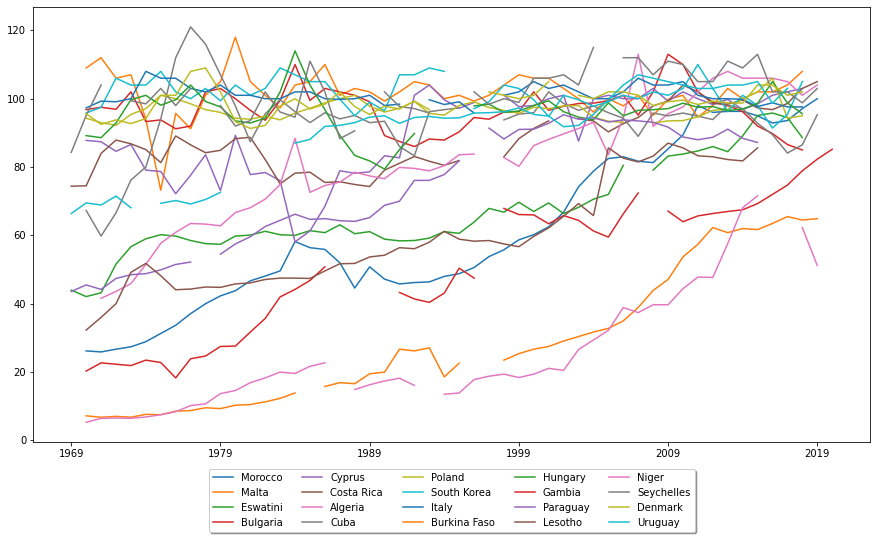

In [47]:
ax = plt.gca()
escola_primaria.plot(kind='line',use_index=True, ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)


Mesmo selecionando os 20 melhores países em termos de completude dos dados ainda podemos facilmente ver as lacunas no gráfico.
O Gráfico confirma a tendência esperada de crescimento do indice.

# Analise índice de desigualdade econômica

In [61]:
indice_desigualdade_economica=pd.read_csv('gini.csv')
display(indice_desigualdade_economica.shape)
display(indice_desigualdade_economica.head())


(197, 252)

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2
1,Angola,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
2,Albania,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,...,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7
3,Andorra,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
4,United Arab Emirates,39.8,39.8,39.8,39.8,39.8,39.8,39.8,39.7,39.7,...,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9


In [62]:
# reformatando a tabela para um formato mais conveniente
indice_desigualdade_economica=indice_desigualdade_economica.set_index('country')
indice_desigualdade_economica=indice_desigualdade_economica.T
indice_desigualdade_economica.columns.name = 'Ano'
display(indice_desigualdade_economica.head())

Ano,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1799,30.5,57.7,39.9,42.5,39.8,47.7,31.5,43.4,38.7,53.4,...,33.9,43.2,60.4,33.8,40.5,40.7,49.8,35.2,52.1,27.3
1800,30.5,57.7,39.9,42.5,39.8,47.7,31.5,43.4,38.7,53.4,...,33.9,43.2,60.4,33.8,40.5,40.7,49.8,35.2,52.1,27.3
1801,30.5,57.7,39.9,42.5,39.8,47.7,31.5,43.4,38.7,53.4,...,33.9,43.2,60.4,33.8,40.5,40.7,49.8,35.2,52.1,27.3
1802,30.5,57.7,39.9,42.5,39.8,47.7,31.5,43.4,38.7,53.4,...,33.9,43.2,60.4,33.8,40.5,40.7,49.8,35.2,52.1,27.3
1803,30.5,57.7,39.9,42.5,39.8,47.7,31.5,43.4,38.7,53.4,...,33.9,43.2,60.4,33.8,40.5,40.7,49.8,35.2,52.1,27.3


In [63]:
# conta os nulos por país e ordena
desigualdade_nulos = escola_primaria.isna().sum().sort_values()
desigualdade_nulos

Ano
Morocco         2
Malta           3
Eswatini        3
Bulgaria        3
Poland          4
Cuba            4
South Korea     4
Costa Rica      4
Cyprus          4
Algeria         4
Italy           5
Burkina Faso    5
Hungary         6
Gambia          6
Paraguay        6
Lesotho         6
Niger           6
Denmark         7
Seychelles      7
Uruguay         8
dtype: int64

Esse indice possui um preenchemento bem melhor que a outra.

In [64]:
# seleciona os mesmo países analisados para a outra tabela
indice_desigualdade_economica = indice_desigualdade_economica[lista_de_paises]
display(indice_desigualdade_economica.head())

Ano,Morocco,Malta,Eswatini,Bulgaria,Cyprus,Costa Rica,Algeria,Cuba,Poland,South Korea,Italy,Burkina Faso,Hungary,Gambia,Paraguay,Lesotho,Niger,Seychelles,Denmark,Uruguay
1799,54.7,33.4,61.3,38.9,29.9,47.0,56.2,43.7,29.5,32.1,57.4,37.6,37.5,41.5,40.8,55.8,35.8,41.4,54.1,49.1
1800,54.7,33.4,61.3,38.9,29.9,47.0,56.2,43.7,29.5,32.1,57.4,37.6,37.5,41.5,40.8,55.8,35.8,41.4,54.1,49.1
1801,54.7,33.4,61.3,38.9,29.9,47.0,56.2,43.7,29.5,32.1,57.4,37.6,37.5,41.5,40.8,55.8,35.8,41.4,54.1,49.1
1802,54.7,33.4,61.3,38.9,29.9,47.0,56.2,43.7,29.5,32.1,57.4,37.6,37.5,41.5,40.8,55.8,35.8,41.4,54.1,49.1
1803,54.7,33.4,61.3,38.9,29.9,47.0,56.2,43.7,29.5,32.1,57.4,37.6,37.5,41.5,40.8,55.8,35.8,41.4,54.1,49.1


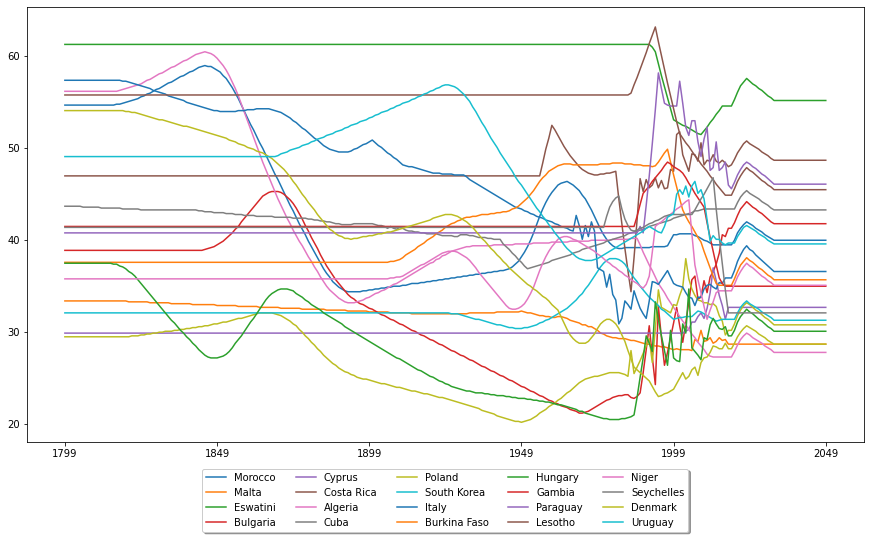

In [65]:
ax = plt.gca()
indice_desigualdade_economica.plot(kind='line',use_index=True, ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

Embora essa tabela tenha um preenchimento melhor, podemos ver que muitos valores se repetem continuamente como se estivessem fixados nos periodo sem coleta real do dado, indicando possível preenchimento artificial dos valores por extrapolação, notavelmente a tabela se inicia em 1799 e termina em 2049.

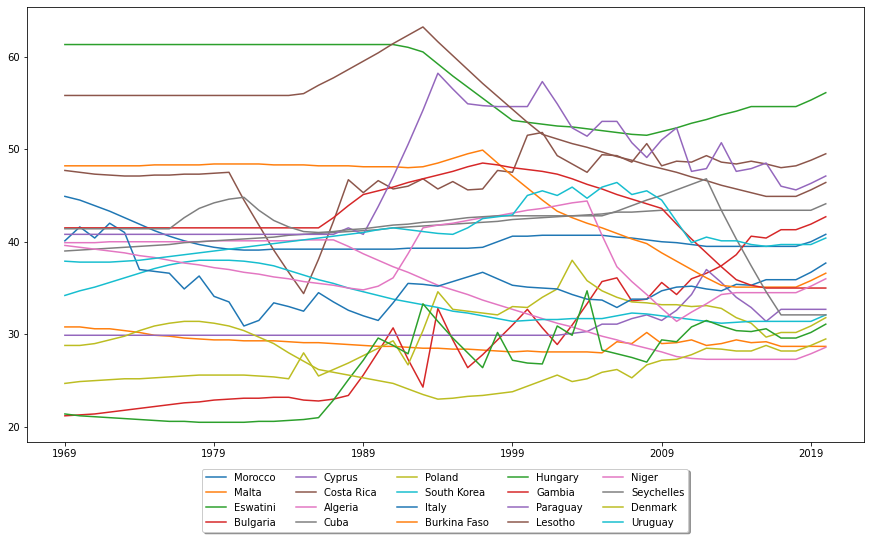

In [66]:
indice_desigualdade_economica=indice_desigualdade_economica.filter(items=escola_primaria.index, axis=0)
ax = plt.gca()
indice_desigualdade_economica.plot(kind='line',use_index=True, ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

Filtrando o mesmo período da outra tabela os dados parecem fazer mais sentido.

# Correlação

Esperamos ver uma correlação entre a melhora no indicador de escolaridade básica e o índice de desigualdade econômica.

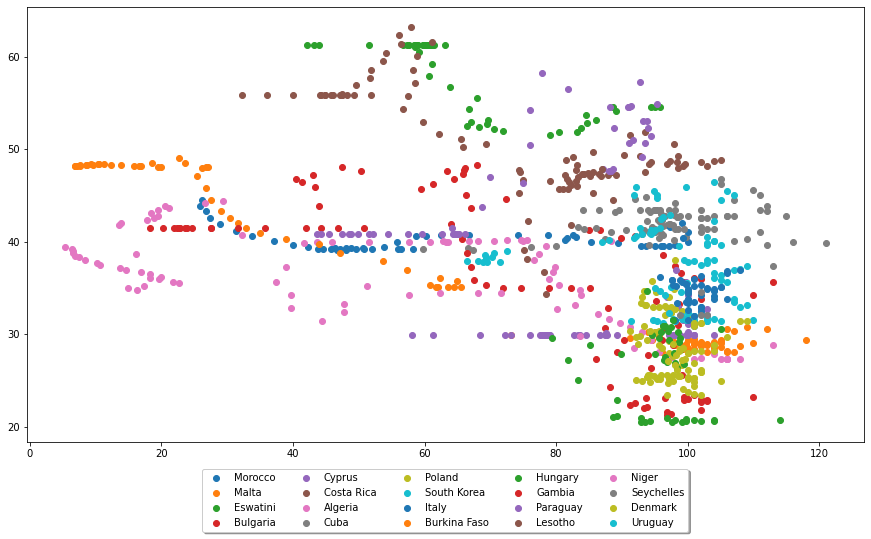

In [80]:
ax = plt.gca()

# plota os pontos de cada país
for pais in lista_de_paises:
  x = escola_primaria[pais]
  y = indice_desigualdade_economica[pais]
  plt.scatter(x,y, label=pais)
# legenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

Podemos ver que há uma diminuição do índice de desigualdade econômica com a melhora da escolaridade primária, mas a correlação não é extremamente clara pois esse certamente não é o único fator que afeta esse índice.